In [1]:
import sys
sys.path.append("..")
import seaborn as sns
import matplotlib.pyplot as plt
from estim8 import *
import pandas as pd

In [2]:
# load FMU model
model_path = "../tests/test_data/SimpleBatch.fmu"
model = models.FmuModel(model_path)

# load experimental data
data = pd.read_excel("../examples/SimpleBatch_data.xlsx", index_col=0, header=(0, 1))
data.columns = data.columns.droplevel(1)

## Figure FMU model simulations 

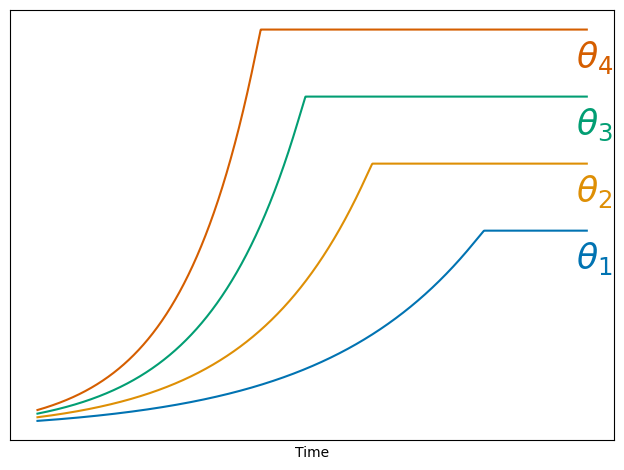

In [3]:
params = [{par: val*i*0.3 for par, val in model.parameters.items() if par in ["mu_max", "X0", "Y_XS"]} for i in range(3, 7)]

sims = [
    model.simulate(t0=0, t_end=10, stepsize=1e-3, parameters= parameters, observe=["X"])
    for parameters in params
]
fig, ax = plt.subplots()
for i, (sim, color) in enumerate(zip(sims, sns.color_palette("colorblind"))):
    visualization.plot_model_prediction(ax, sim["X"], color=color)
    # Add text annotation with theta_i
    last_x = sim["X"].timepoints[-1]
    last_y = sim["X"].values[-1]
    ax.text(last_x-0.2 , last_y-0.64, fr'$\theta_{i+1}$', fontsize=25, color=color)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("Time")

fig.tight_layout()

fig.savefig("FmuModel_simulation.svg")

## Figure Model fitting 

In [4]:
estimator = Estimator(model, bounds={"X0": [0.08, 0.15], "mu_max": [0.3, 0.7], "Y_XS": [0.2, 0.8]},data=data )
estimates, _ = estimator.estimate(method="de", max_iter=1000, n_jobs=4)

e:\estim8\paper\..\estim8\estimator.py:271: UserWarning: No timepoints specified. Timepoints derived from data were set to [0.0, 10.0, 0.09900990099009901].
  warn(
c:\Users\Tobia\miniforge-pypy3\envs\testim8\lib\site-packages\scipy\optimize\_differentialevolution.py:487: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


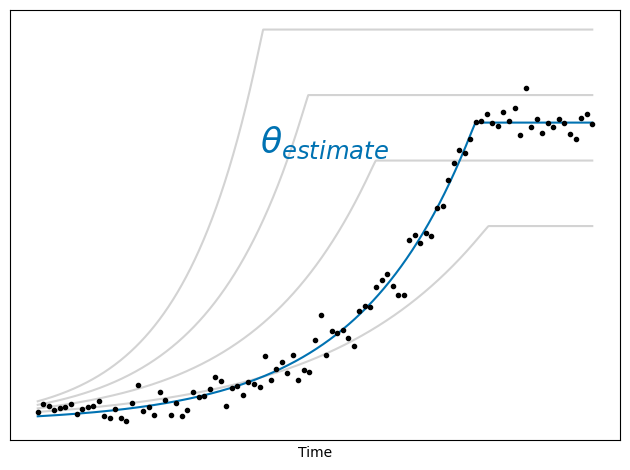

In [5]:
params = [{par: val*i*0.3 for par, val in model.parameters.items() if par in ["mu_max", "X0", "Y_XS"]} for i in range(3, 7)]
sims = [
    model.simulate(t0=0, t_end=10, stepsize=1e-3, parameters= parameters, observe=["X"])
    for parameters in params
]
fig, ax = plt.subplots()
for i, sim,  in enumerate(sims):
    visualization.plot_model_prediction(ax, sim["X"], color="lightgrey")
    

visualization.plot_measurement(ax=ax, measurement=estimator.data[None]["X"], color="black")

sim_estimate = model.simulate(t0=0, t_end=10, stepsize=1e-3, parameters=estimates, observe=["X"])
visualization.plot_model_prediction(ax, sim_estimate["X"], color="C0")
ax.text(sim_estimate["X"].timepoints[-1]*0.4 , sim_estimate["X"].values[-1]*0.9, r'$\theta_{estimate}$', fontsize=25, color="C0")


ax.set_yticks([])
ax.set_xticks([])
ax.set_xlabel("Time")

fig.tight_layout()
fig.savefig("estimation_fwd.svg")